In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fr 10 Jan 2020

@author: caroline
"""# from: https://annefou.github.io/metos_python/02-formats/

#from netCDF4 import Dataset
import numpy as np

import matplotlib.pyplot as plt
#from mpl_toolkits import basemap

# import of NetCDF files
import netCDF4

# n-dimensional arrays
import numpy as np

# high level functions for working with NetCDF files
import xarray as xr

# add colour labels to plot
import matplotlib.patches as mpatches

import cartopy as ccrs


In [54]:
ds_orography = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/Era5_orography_singleLevel.nc')

In [66]:
ds_orography['z_0005']

NameError: name 'time' is not defined

In [5]:
ds_orography['z_0005']

<xarray.DataArray 'z_0005' (time: 2, latitude: 721, longitude: 1440)>
[2076480 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-03-01 2019-12-01
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [8]:
# grid location (lon/lat) of Mauna Kea
ds_MaunaKea = ds_orography.sel(longitude=204.53,latitude= 19.83,method='nearest')

In [1]:
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:

fh = Dataset("/home/caroline/hulk/Astroclimate/cds_data_ERA5/Era5_orography_singleLevel.nc", mode = "r", format="NETCDF4")
print(fh.data_model)

lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]

t = fh.variables['time'][:]
# hcc = fh.variables['hcc_0001']
height = fh.variables['z_0001'][:]

fh.close()


#fh_rel = Dataset("/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/Era5_2009to2018_RH_600hPa.nc", mode = "r", format="NETCDF4")

#lons2 = fh.variables['longitude'][:]
#lats2 = fh.variables['latitude'][:]

#t2 = fh.variables['time'][:]
# hcc = fh.variables['hcc_0001']
#RH = fh.variables['r'][:]

#fh.close()


ds_RH = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/Era5_2009to2018_RH_600hPa.nc')
RH = ds_RH['r']


NETCDF3_64BIT_OFFSET


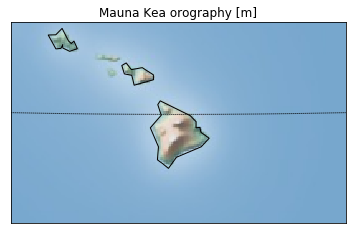

<Figure size 432x288 with 0 Axes>

In [5]:

# setup stereographic basemap.
# lon_0,lat_0 is central point.
m = Basemap(width=750000,height=450000, #width=120000,height=80000,
            resolution='l',projection='stere',\
            lat_0=19.83,lon_0=-155.47)


lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)            
              
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# m.drawmapboundary(fill_color='aqua')

# Nasa's image
#m.bluemarble()

m.shadedrelief()

plt.title("Mauna Kea orography [m]")
plt.show()
plt.savefig('Basemap_relief.pdf')



In [3]:

ds_orography = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/Era5_orography_singleLevel.nc')
ds_MaunaKea = ds_orography.sel(longitude=204.53,latitude= 19.83,method='nearest')
MK = ds_MaunaKea['z_0001']
MK[1]

<xarray.DataArray 'z_0001' ()>
array(nan, dtype=float32)
Coordinates:
    longitude  float32 204.5
    latitude   float32 19.75
    time       datetime64[ns] 2019-12-01
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [ ]:
ds_RH_nearest = ds_RH.sel(longitude=204.53,latitude= 19.83,method='nearest')


In [4]:
# grid location (lon/lat) of CFHT
ds_CFHT = ds_orography.sel(longitude=204.72,latitude= 19.49,method='nearest')


#grid location (lon/lat) of MaunaKea
ds_MaunaKea = ds_orography.sel(longitude=(360-155.46806),latitude= 19.82083,method='nearest')



In [31]:
ds_MaunaKea['z_0001']/g

#ds_CFHT['z_0001']/g

<xarray.DataArray 'z_0001' (time: 2)>
array([2185.175,      nan], dtype=float32)
Coordinates:
    longitude  float32 204.5
    latitude   float32 19.75
  * time       (time) datetime64[ns] 2019-03-01 2019-12-01

In [17]:
######################## m2 for data ###############

m2 = Basemap(width=250000,height=150000,
            resolution='l',projection='lcc',\
            lat_0=19.83,lon_0=-155.47)


In [10]:
#some of america --> MaunaKea
m2 = Basemap(width=250000,height=150000,projection='lcc',
            resolution='c',lat_1=19.,lat_2=20,lat_0=19.83,lon_0=-155.47)

In [9]:
#some of america
m2 = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

In [11]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = m2(lon, lat) 

In [22]:
(360-155.46806)


204.53194

In [25]:
# height[0,19.82083, 204.53194]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

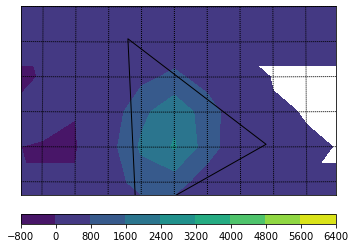

In [12]:
m2.drawcoastlines()
m2.drawparallels(np.arange(-80.,81.,0.25))
m2.drawmeridians(np.arange(-180.,181.,0.25))

# Plot Data
g=9.80665 # divide height by g to get the height in meters
#cs = m2.pcolor(xi,yi, (height[0,:,:]/g))
#cs = m2.pcolor(xi, yi, (height[0,:,:]/g))
cs = m2.contourf(xi,yi, height[0,:,:]/g)

#cs_r = m2.contourf(xi, yi, RH[0, :, :])
#cs_r = m2.pcolormesh(xi, yi, RH[0, :, :])              

# Add Colorbar
cbar = m2.colorbar(cs, location='bottom', pad="10%") 
#plt.figure(figsize=(7,7), dpi = 300)
fig1 = plt.gcf()
fig1.savefig('MaunaKea_orography.pdf')
plt.show()


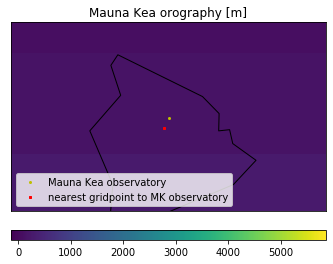

<Figure size 432x288 with 0 Axes>

In [35]:
    
m2.drawcoastlines()
m2.drawparallels(np.arange(-80.,81.,0.25))
m2.drawmeridians(np.arange(-180.,181.,0.25))

# Plot Data
g=9.80665 # divide height by g to get the height in meters
cs = m2.pcolor(xi,yi, (height[0,:,:]/g))
# cs = m2.contourf(xi,yi, height[0,:,:]/g)

#cs_r = m2.contourf(xi, yi, RH[0, :, :])
#cs_r = m2.pcolormesh(xi, yi, RH[0, :, :])              

# Add Colorbar
cbar = m2.colorbar(cs, location='bottom', pad="10%") 

#m2.bluemarble()
# m2.etopo()

#CFHT
#lon = -155.28
#lat = 19.49
#x,y = m2(lon, lat)
#m2.plot(x, y, 'bo', markersize=2, label = 'CFHT')

#nearest
#lon = -155.25
#lat = 19.5
#x,y = m2(lon, lat)
#m2.plot(x, y, 'ro', markersize=2, label = 'nearest gridpoint to CFHT')

#observatory (google maps) Mauna Kea
lon = -155.46806
lat = 19.82083
x,y = m2(lon, lat)
m2.plot(x, y, 'yo', markersize=2, label = 'Mauna Kea observatory')

#nearest
lon = -155.5
lat = 19.75
x,y = m2(lon, lat)
m2.plot(x, y, 'rs', markersize=2, label = 'nearest gridpoint to MK observatory')

plt.title("Mauna Kea orography [m]")
plt.legend(loc = 'lower left')
plt.show()
plt.savefig('MaunaKea_orography.pdf')

In [36]:
360-155.57

204.43

In [22]:
360-204.75

155.25

In [20]:
360-155.28


204.72